## (2)국가별 광종 수출입 현황

주요 수출국 및 수입국 파악

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.dates as mdates

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
import_export_status = pd.read_csv('국가별 광종 수출입 현황.csv', encoding='euc-kr')

In [4]:
import_export_status

,기간,품목명,국가명,수출중량(톤),수출금액(천불),수입중량(톤),수입금액(천불)
0,2021,동,남아프리카공화국,NaN,NaN,NaN,NaN
1,2021,동,네덜란드,0.0,0.0,0.0,0.0
2,2021,동,독일,NaN,NaN,NaN,NaN
3,2021,동,러시아연방,0.0,0.0,0.0,12.0
4,2021,동,멕시코,0.0,0.0,10185.0,23815.0
...,...,...,...,...,...,...,...
1071,2022,토탄,캐나다,0.0,0.0,2891.0,1671.0
1072,2022,토탄,폴란드,0.0,0.0,2310.0,592.0
1073,2022,토탄,프랑스,0.0,0.0,0.0,0.0
1074,2022,토탄,핀란드,0.0,0.0,0.0,0.0


In [5]:
import_export_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        1076 non-null   int64  
 1   품목명       1076 non-null   object 
 2   국가명       1076 non-null   object 
 3   수출중량(톤)   837 non-null    float64
 4   수출금액(천불)  837 non-null    float64
 5   수입중량(톤)   838 non-null    float64
 6   수입금액(천불)  838 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.0+ KB


In [6]:
# 결측치 제거
import_export_status.dropna(inplace=True)

In [7]:
import_export_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 1 to 1074
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        831 non-null    int64  
 1   품목명       831 non-null    object 
 2   국가명       831 non-null    object 
 3   수출중량(톤)   831 non-null    float64
 4   수출금액(천불)  831 non-null    float64
 5   수입중량(톤)   831 non-null    float64
 6   수입금액(천불)  831 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ KB


In [8]:
# 니켈, 코발트, 망간은 있는데 리튬이 없음
import_export_status['품목명'].unique()

array(['동', '연', '아연', '철', '알루미늄', '텅스텐', '몰리브덴', '티타늄', '망간', '주석',
       '니켈', '코발트', '크롬', '탄탈륨', '니오븀', '바나듐', '토상흑연', '인상흑연', '형석',
       '석회석류', '규석', '마그네사이트', '무연탄', '유연탄', '갈탄', '토탄'], dtype=object)

In [9]:
# 이 데이터는 모든 광물을 조사할 필요가 없어서 니켈, 코발트, 망간의 데이터로만 분석 진행
# 각 광물별로 어느나라에서 수입을 많이 하는지 확인

list1 = ['니켈', '코발트', '망간', '리튬']
import_export_data = import_export_status[import_export_status['품목명'].isin(list1)]

In [10]:
import_export_pivot = import_export_data.pivot_table(index=['기간', '품목명', '국가명'])

In [11]:
import_export_pivot.sort_values(by=['기간','품목명','수입금액(천불)'],ascending=[True, True, False])

수입금액(천불)    수입중량(톤)  수출금액(천불)  수출중량(톤)
기간   품목명 국가명                                             
2021 니켈  뉴칼레도니아    330115.0  3076534.0       0.0      0.0
         필리핀        10563.0   105000.0       0.0      0.0
         네덜란드           5.0        0.0       0.0      0.0
         룩셈부르크          0.0        0.0       0.0      0.0
         미국             0.0        0.0       0.0      0.0
         일본             0.0        0.0      42.0     86.0
         중국             0.0        0.0       0.0      0.0
         카자흐스탄          0.0        0.0       0.0      0.0
         호주             0.0        0.0       0.0      0.0
     망간  남아프리카공화국  147818.0   717245.0       0.0      0.0
         호주        120337.0   504798.0       0.0      0.0
         가봉         21580.0   101970.0       0.0      0.0
         미국           539.0      380.0       0.0      0.0
         네덜란드          57.0       80.0       0.0      0.0
         중국            13.0       34.0       0.0      0.0
         대만            12.0      588.0       0.0      0.0
         독일             0.0        0.0       0.0      0.0
         볼리비아           0.0        0.0       0.0      0.0
         인도             0.0        0.0       0.0      0.0
         일본             0.0        0.0       0.0      0.0
     코발트 미국             0.0        0.0       0.0      0.0
         잠비아            0.0        0.0       0.0      0.0
         프랑스            0.0        0.0       0.0      0.0
2022 니켈  뉴칼레도니아    348833.0  2401819.0       0.0      0.0
         과테말라       13537.0    96424.0       0.0      0.0
         필리핀        12297.0   109943.0       0.0      0.0
         코트디부아르      7757.0    45100.0       0.0      0.0
         네덜란드           5.0        0.0       0.0      0.0
         미국             1.0        0.0       0.0      0.0
         독일             0.0        0.0       0.0      0.0
         러시아연방          0.0        0.0       0.0      0.0
         볼리비아           0.0        0.0       0.0      0.0
         알바니아           0.0        0.0       0.0      0.0
         일본             0.0        0.0      64.0     46.0
         중국             0.0        0.0     143.0     62.0
         카자흐스탄          0.0        0.0       0.0      0.0
         캐나다            0.0        0.0       0.0      0.0
         탄자니아           0.0        0.0       0.0      0.0
         호주             0.0        0.0       0.0      0.0
     망간  호주        138594.0   485338.0       0.0      0.0
         남아프리카공화국  130060.0   544192.0       0.0      0.0
         가봉          9951.0    36497.0       0.0      0.0
         일본          4506.0    19501.0       0.0      0.0
         미국           468.0      323.0       0.0      0.0
         네덜란드          48.0       60.0       0.0      0.0
         중국             4.0       19.0       2.0     20.0
         독일             0.0        0.0       0.0      0.0
         모로코            0.0        0.0       0.0      0.0
         베트남            0.0        0.0       3.0     93.0
         이탈리아           0.0        0.0       0.0      0.0
     코발트 영국            87.0       12.0       0.0      0.0
         프랑스            7.0        0.0       0.0      0.0
         독일             1.0        0.0       0.0      0.0
         네덜란드           0.0        0.0       0.0      0.0
         이집트            0.0        0.0       0.0      0.0
         콩고민주공화국        0.0        0.0       0.0      0.0

### 분석결과

⭐니켈 

(2021)
- 뉴칼레도니아에서 $330,115,000, 3,076,534톤 수입 =>가장 많이 수입
- 필리핀에서 $10,563,000, 105,000톤 수입 => 두번째로 많이 수입

(2022)
- 뉴칼레도니아에서 $348,833,000, 2,401,819톤 수입 => 가장 많이 수입
- 과테말라에서 $13,537,000, 96,424 톤 수입 => 두번째로 많이 수입
- 필리핀에서 $12297,000, 109,943톤 수입 =>세번째로 많이 수입

=> 뉴칼레도니아, 필리핀, 과테말라, 코디부아르에서 주로 수입

=> 수출의 경우 2021년에 일본에, 2022년에는 일본,중국에 수출



⭐망간

(2021)
- 남아프리카공화국에서 $147,818,000, 717,245톤 수입 =>가장 많이 수입
- 호주에서 $120,337,000, 504,798톤 수입 => 두번째로 많이 수입
- 가봉, 미국, 네덜란드, 중국, 대만 순으로 수입
- 근데 대만꺼가 싼가? 588톤인데 $12,000이다. 그럼 1톤에 $20? 내가 잘못 이해한건가?


(2022)
- 호주에서 $138,594,000, 485,338톤 수입 => 가장 많이 수입
- 남아프리카공화국에서 $130,060,000, 544,192톤 수입 => 두번째로 많이 수입
- 가봉, 일본, 미국, 네덜란드, 중국 순으로 많이 수입

=> 호주, 남아프리카공화국, 가봉, 일본에서 주로 수입

=> 수출의 경우 2022년에 베트남과 중국에 수출

⭐코발트

(2022)
- 영국에서 $87,000, 12톤 수입 => 가장 많이 수입
- 프랑스에서 $7,000 수입 
- 독일에서도 $1,000 수입

=> 영국, 프랑스에서 주로 수입

=> 수출은 없었음

## (3) 광종별 국가별 생산량

In [12]:
df_production = pd.read_csv('광종별국가별생산량.csv', encoding='euc-kr')

In [13]:
df_production['광종'].unique()

array(['알루미늄', '안티모니', '카드뮴', '동', '금', '연', '몰리브덴', '니켈', '은', '주석',
       '아연'], dtype=object)

In [14]:
df_production['품목'].unique()

array(['bauxite', 'refined', 'mine', 'slab'], dtype=object)

In [15]:
## 니켈만 가져오기, 단위 : 천톤

df_production_nickel = df_production[df_production['광종']=='니켈']

In [16]:
df_production_nickel = df_production_nickel.drop(columns=['광종','단위'])

In [17]:
df_production_nickel

,품목,대륙,국가,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
442,mine,EUROPE,Albania,3.528,0.728,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548
443,mine,EUROPE,Finland,19.081,19.955,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568
444,mine,EUROPE,Greece,21.100,21.550,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000
445,mine,EUROPE,Kosovo,7.632,4.436,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360
446,mine,EUROPE,Macedonia,3.600,1.704,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,refined,AMERICA,Dominican Republic,13.498,15.186,9.400,0.000,0.000,9.913,15.632,19.214,28.450,21.316,27.320,28.400,19.424
501,refined,AMERICA,Guatemala,0.000,0.000,0.000,2.985,10.818,8.688,12.417,14.688,20.323,22.894,19.931,18.419,1.514
502,refined,AMERICA,Venezuela,13.400,8.100,3.261,2.500,4.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
503,refined,OCEANIA,Australia,110.213,125.634,141.252,137.762,152.978,120.520,108.500,114.517,106.470,115.800,98.970,96.500,92.300


In [18]:
df_production_nickel['품목'].unique()

array(['mine', 'refined'], dtype=object)

In [19]:
# 니켈에는 품목이 mine, refined 두개 있음
# mine 데이터와 refined 데이터 두개로 나누기

nickel_mine = df_production_nickel[df_production_nickel['품목']=='mine']
nickel_refined = df_production_nickel[df_production_nickel['품목']=='refined']

### 대륙별로 나눠서 비교

#### NICKEL - mine

In [20]:
nickel_mine['대륙'].unique()

array(['EUROPE', 'AFRICA', 'ASIA', 'AMERICA', 'OCEANIA'], dtype=object)

In [21]:
# 대륙별 각 국가의 생산량 변화량 비교

nickelm_europe = nickel_mine[nickel_mine['대륙']=='EUROPE'].drop(columns=['품목', '대륙'])
nickelm_africa = nickel_mine[nickel_mine['대륙']=='AFRICA'].drop(columns=['품목', '대륙'])
nickelm_asia = nickel_mine[nickel_mine['대륙']=='ASIA'].drop(columns=['품목', '대륙'])
nickelm_america = nickel_mine[nickel_mine['대륙']=='AMERICA'].drop(columns=['품목', '대륙'])
nickelm_oceania = nickel_mine[nickel_mine['대륙']=='OCEANIA'].drop(columns=['품목', '대륙'])

In [22]:
def line_graph_c(df):
    years = [str(year) + ' 생산량' for year in range(2011, 2024)]
    df_years = df.set_index('국가')[years].T # 데이터프레임 전치 => 행열전환
    df_years.index = df_years.index.str.replace(' 생산량', '')

    # 국가별 생산량 변화량 비교
    plt.figure(figsize=(10, 6))

    for country in df['국가']:
        plt.plot(df_years.index, df_years[country], marker='o', label=country)
        
    plt.title('국가별 생산량 변화 비교')
    plt.xlabel('')
    plt.ylabel('생산량')
    plt.legend()
    plt.grid()
    plt.show()


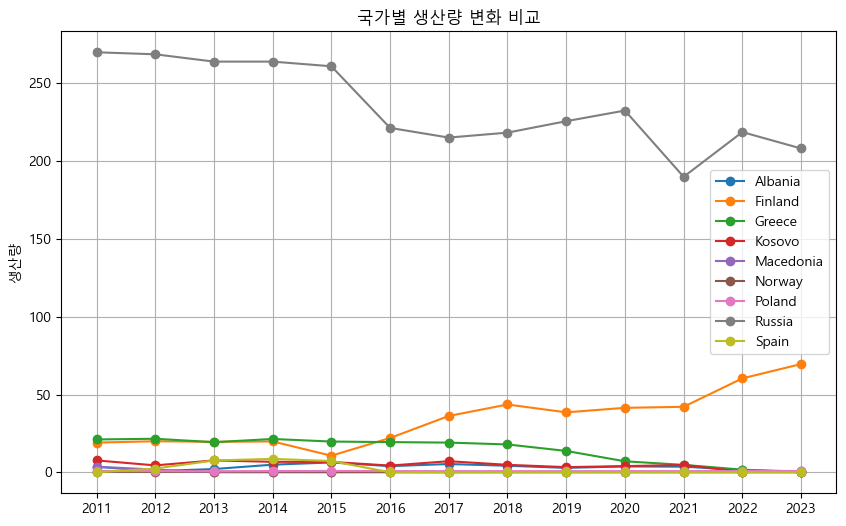

In [23]:
line_graph_c(nickelm_europe)

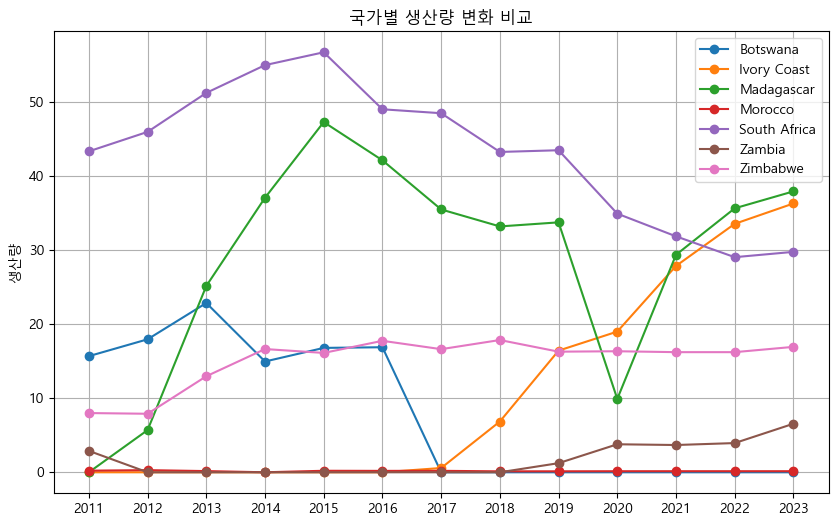

In [24]:
line_graph_c(nickelm_africa)

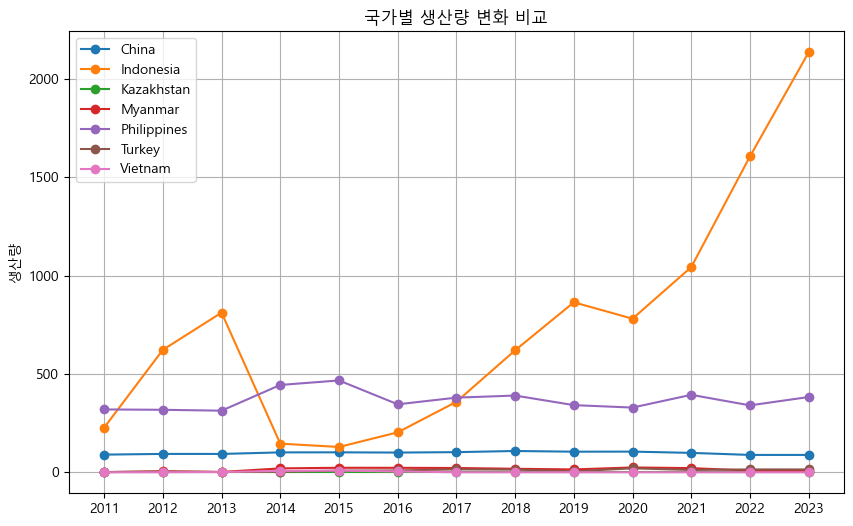

In [25]:
line_graph_c(nickelm_asia)

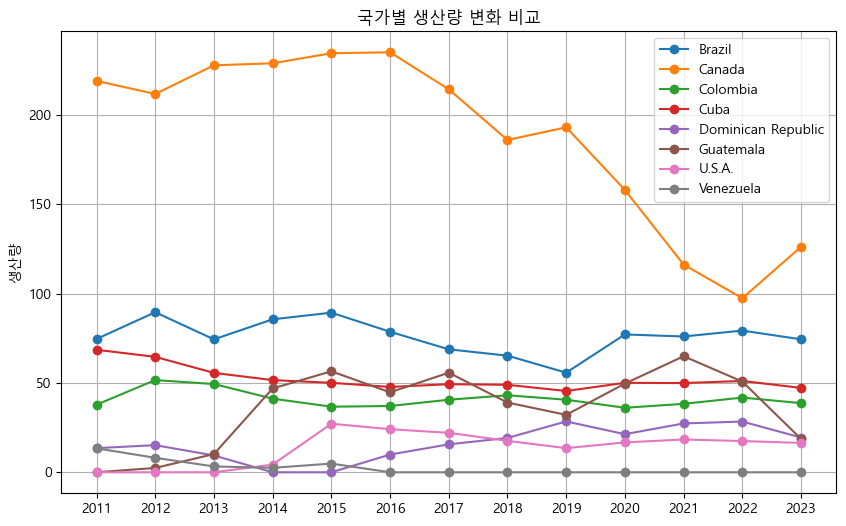

In [26]:
line_graph_c(nickelm_america)

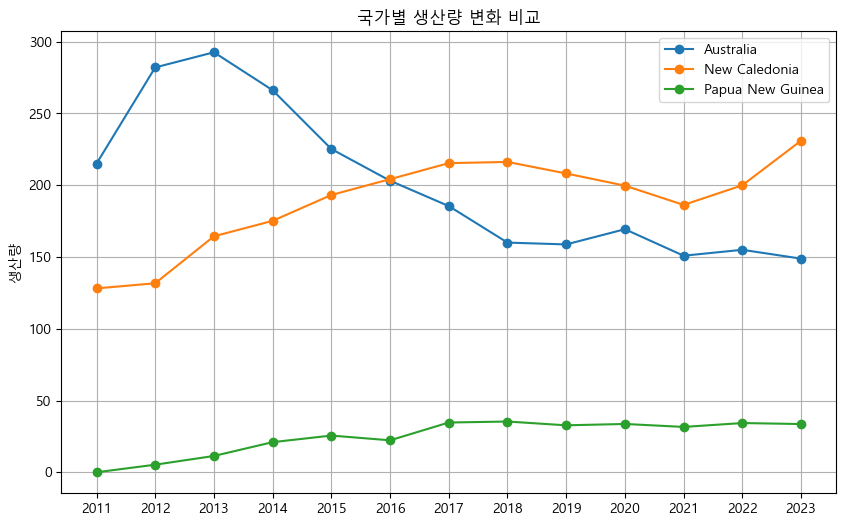

In [27]:
line_graph_c(nickelm_oceania)

#### NICKEL - refined

In [28]:
nickel_refined['대륙'].unique()

array(['EUROPE', 'AFRICA', 'ASIA', 'AMERICA', 'OCEANIA'], dtype=object)

In [29]:
# 대륙별 각 국가의 생산량 변화량 비교

nickelr_europe = nickel_refined[nickel_refined['대륙']=='EUROPE'].drop(columns=['품목', '대륙'])
nickelr_africa = nickel_refined[nickel_refined['대륙']=='AFRICA'].drop(columns=['품목', '대륙'])
nickelr_asia = nickel_refined[nickel_refined['대륙']=='ASIA'].drop(columns=['품목', '대륙'])
nickelr_america = nickel_refined[nickel_refined['대륙']=='AMERICA'].drop(columns=['품목', '대륙'])
nickelr_oceania = nickel_refined[nickel_refined['대륙']=='OCEANIA'].drop(columns=['품목', '대륙'])

In [30]:
nickelr_europe

,국가,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
476,Austria,0.500,0.500,0.500,0.600,0.700,0.700,0.700,0.700,0.700,0.700,0.700,1.000,1.000
477,Finland,48.524,45.518,44.252,42.603,43.479,53.653,59.716,60.765,62.422,63.352,48.789,69.308,70.031
478,France,13.916,13.546,12.916,8.812,6.761,4.287,2.417,3.700,6.900,7.300,8.900,6.842,7.125
479,Greece,18.530,18.600,16.827,18.481,17.113,17.069,16.781,15.719,11.974,6.011,4.079,1.444,0.000
480,Kosovo,7.500,4.436,7.607,6.724,6.650,2.519,8.501,4.388,5.234,7.811,5.911,0.000,0.000
481,Macedonia,17.292,19.247,20.001,18.054,17.699,10.607,7.175,10.100,15.202,17.747,17.714,8.349,3.812
482,Norway,92.427,91.687,91.000,90.500,91.200,92.700,86.500,90.800,92.100,91.100,91.200,81.900,95.000
483,Poland,0.850,0.800,0.600,0.780,0.840,0.770,0.720,0.700,0.720,0.710,0.720,0.800,0.840
484,Russia,266.000,254.000,242.000,239.436,231.916,192.095,157.395,150.325,154.058,154.402,121.088,149.269,146.104
485,Ukraine,22.475,20.833,26.751,25.129,20.842,18.920,15.605,16.331,15.133,15.910,15.657,10.093,0.733


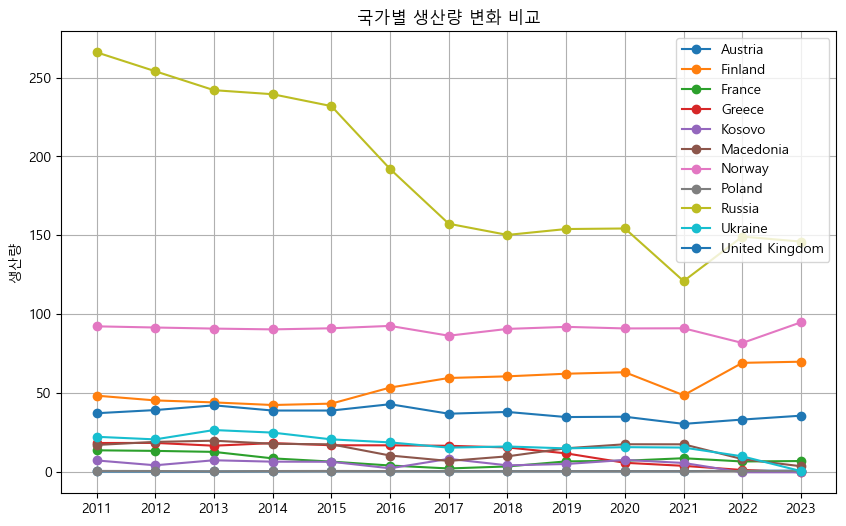

In [31]:
line_graph_c(nickelr_europe)

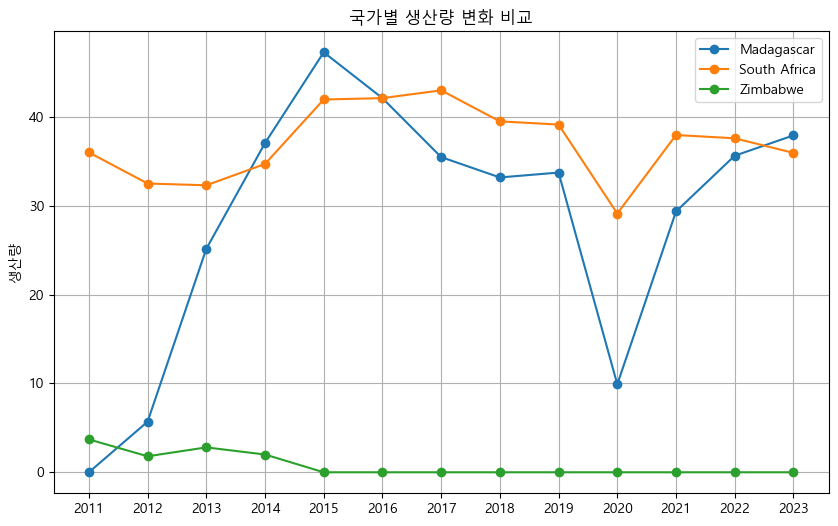

In [32]:
line_graph_c(nickelr_africa)

In [33]:
nickelr_asia

,국가,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
490,China,469.744,590.872,710.657,537.137,453.197,436.973,620.982,732.919,852.375,752.189,813.790,885.955,956.621
491,India,0.000,0.000,1.010,2.028,1.861,0.329,0.092,0.077,0.055,0.000,0.000,0.000,0.000
492,Indonesia,19.690,18.373,22.849,21.603,47.430,105.071,197.338,287.736,386.418,630.358,873.144,1139.640,1455.111
493,Japan,156.883,169.556,177.810,177.782,192.789,195.565,187.046,186.736,182.652,171.044,180.721,163.401,153.248
494,Myanmar,0.000,4.900,1.670,19.714,22.902,22.600,21.785,17.802,14.445,24.539,21.127,8.434,5.901
495,South Korea,16.863,23.673,28.130,24.964,39.007,45.616,47.402,45.593,46.269,45.604,47.270,31.959,40.022


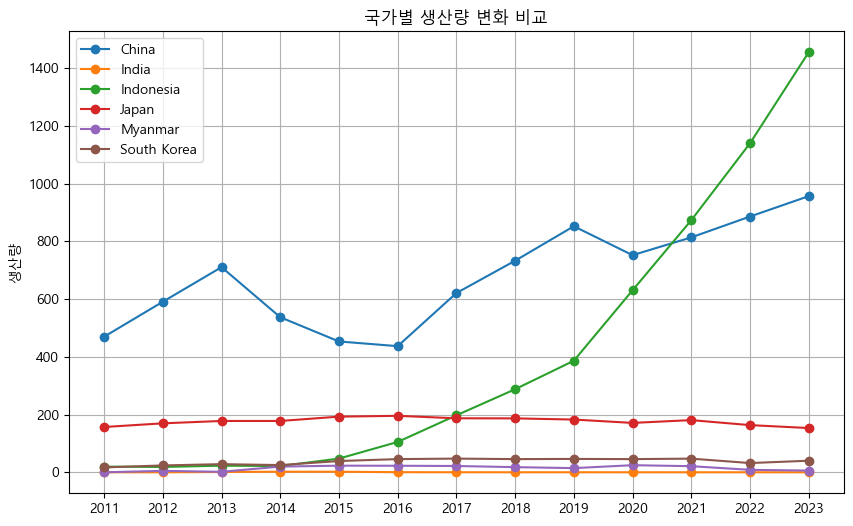

In [34]:
line_graph_c(nickelr_asia)

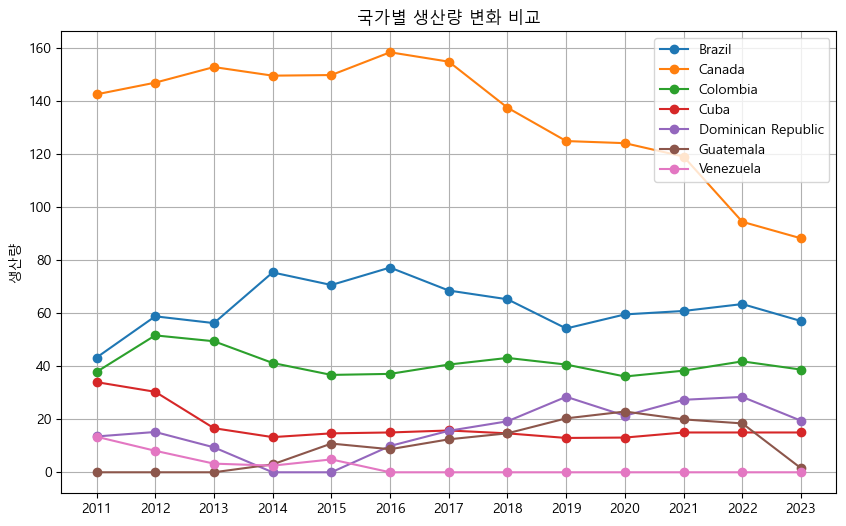

In [35]:
line_graph_c(nickelr_america)

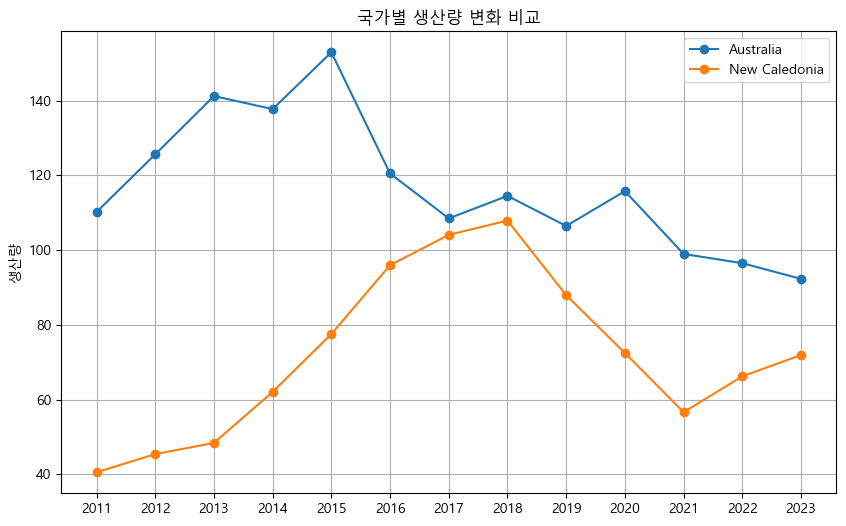

In [36]:
line_graph_c(nickelr_oceania)

### 대륙끼리 비교

#### NICKEL - mine

In [37]:
nickel_mine_tmp = nickel_mine.drop(columns=['품목','국가'])

In [38]:
nickel_mine_tmp.head(10)

,대륙,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
442,EUROPE,3.528,0.728,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548
443,EUROPE,19.081,19.955,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568
444,EUROPE,21.100,21.550,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000
445,EUROPE,7.632,4.436,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360
446,EUROPE,3.600,1.704,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
447,EUROPE,0.326,0.253,0.380,0.346,0.265,0.214,0.172,0.254,0.190,0.274,0.285,0.263,0.253
448,EUROPE,0.850,0.800,0.600,0.780,0.840,0.770,0.720,0.700,0.720,0.710,0.720,0.800,0.840
449,EUROPE,270.000,268.700,264.000,264.000,261.000,221.387,215.167,218.342,225.704,232.532,189.945,218.703,208.155
450,EUROPE,0.000,2.398,7.574,8.631,7.213,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
451,AFRICA,15.675,17.948,22.848,14.952,16.788,16.878,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [39]:
nickelm_pivot = nickel_mine_tmp.pivot_table(index='대륙', aggfunc='sum')

In [40]:
nickelm_pivot

,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
대륙,,,,,,,,,,,,,
AFRICA,70.093,77.775,112.326,123.595,137.060,125.908,101.326,101.247,111.259,84.054,109.084,118.495,127.564
AMERICA,426.872,443.163,429.981,460.968,499.127,477.271,466.438,419.074,408.969,408.961,391.057,366.238,340.998
ASIA,637.700,1041.853,1221.779,720.238,736.905,684.861,876.471,1149.464,1329.151,1259.360,1567.877,2056.618,2625.906
EUROPE,326.117,320.524,321.176,326.610,312.670,272.057,283.761,289.753,285.003,289.727,246.153,283.568,279.724
OCEANIA,343.127,419.042,468.396,462.342,444.007,429.615,435.514,411.602,399.657,402.700,368.753,389.262,413.472


In [41]:
nickelm_pivot.index

Index(['AFRICA', 'AMERICA', 'ASIA', 'EUROPE', 'OCEANIA'], dtype='object', name='대륙')

In [42]:
# ' 생산량' 문자열 제거 
nickelm_pivot.columns = nickelm_pivot.columns.str.replace(' 생산량', '')

In [43]:
# 행열 전환
df = pd.DataFrame(nickelm_pivot).T

In [44]:
df

대륙,AFRICA,AMERICA,ASIA,EUROPE,OCEANIA
2011,70.093,426.872,637.700,326.117,343.127
2012,77.775,443.163,1041.853,320.524,419.042
2013,112.326,429.981,1221.779,321.176,468.396
2014,123.595,460.968,720.238,326.610,462.342
2015,137.060,499.127,736.905,312.670,444.007
2016,125.908,477.271,684.861,272.057,429.615
2017,101.326,466.438,876.471,283.761,435.514
2018,101.247,419.074,1149.464,289.753,411.602
2019,111.259,408.969,1329.151,285.003,399.657
2020,84.054,408.961,1259.360,289.727,402.700


In [45]:
df.columns

Index(['AFRICA', 'AMERICA', 'ASIA', 'EUROPE', 'OCEANIA'], dtype='object', name='대륙')

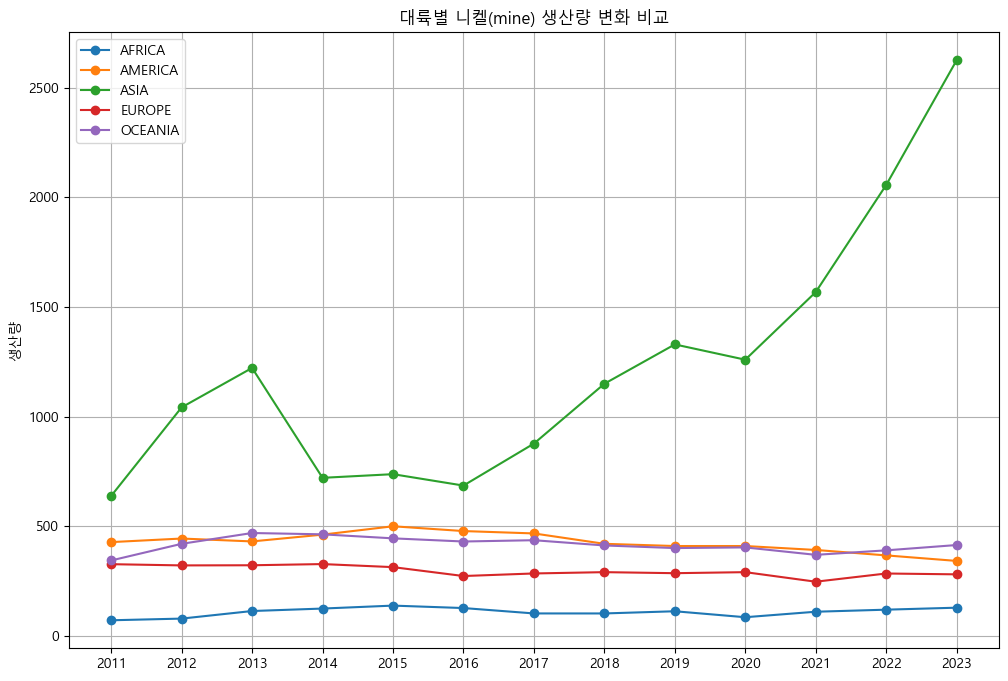

In [46]:
# 대륙별 생산량 변화량 비교
plt.figure(figsize=(12, 8))

for c in df.columns:
    plt.plot(df.index, df[c], marker='o', label=c)

plt.title('대륙별 니켈(mine) 생산량 변화 비교')
plt.xlabel('')
plt.ylabel('생산량')
plt.legend()
plt.grid()
plt.show()

#### NICKEL - refined

In [47]:
nickel_refined_tmp = nickel_refined.drop(columns=['품목','국가'])

In [48]:
nickelr_pivot = nickel_refined_tmp.pivot_table(index='대륙', aggfunc='sum')

In [49]:
nickelr_pivot

,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
대륙,,,,,,,,,,,,,
AFRICA,39.700,39.995,60.249,73.754,89.228,84.215,78.462,72.677,72.870,39.022,67.310,73.219,73.863
AMERICA,284.363,310.840,287.615,284.747,287.339,306.153,307.659,294.282,281.349,276.936,280.336,261.426,219.810
ASIA,663.180,807.374,942.126,783.228,757.186,806.154,1074.645,1270.863,1482.214,1623.734,1936.052,2229.389,2610.903
EUROPE,525.414,508.567,504.854,490.219,476.294,436.424,392.600,391.739,399.419,400.220,345.412,362.389,360.496
OCEANIA,150.726,171.017,189.623,199.811,230.508,216.503,212.594,222.431,194.391,188.255,155.573,162.720,164.212


In [50]:
# ' 생산량' 문자열 제거 
nickelr_pivot.columns = nickelr_pivot.columns.str.replace(' 생산량', '')

# 행열 전환
df1 = pd.DataFrame(nickelr_pivot).T

In [51]:
df1

대륙,AFRICA,AMERICA,ASIA,EUROPE,OCEANIA
2011,39.700,284.363,663.180,525.414,150.726
2012,39.995,310.840,807.374,508.567,171.017
2013,60.249,287.615,942.126,504.854,189.623
2014,73.754,284.747,783.228,490.219,199.811
2015,89.228,287.339,757.186,476.294,230.508
2016,84.215,306.153,806.154,436.424,216.503
2017,78.462,307.659,1074.645,392.600,212.594
2018,72.677,294.282,1270.863,391.739,222.431
2019,72.870,281.349,1482.214,399.419,194.391
2020,39.022,276.936,1623.734,400.220,188.255


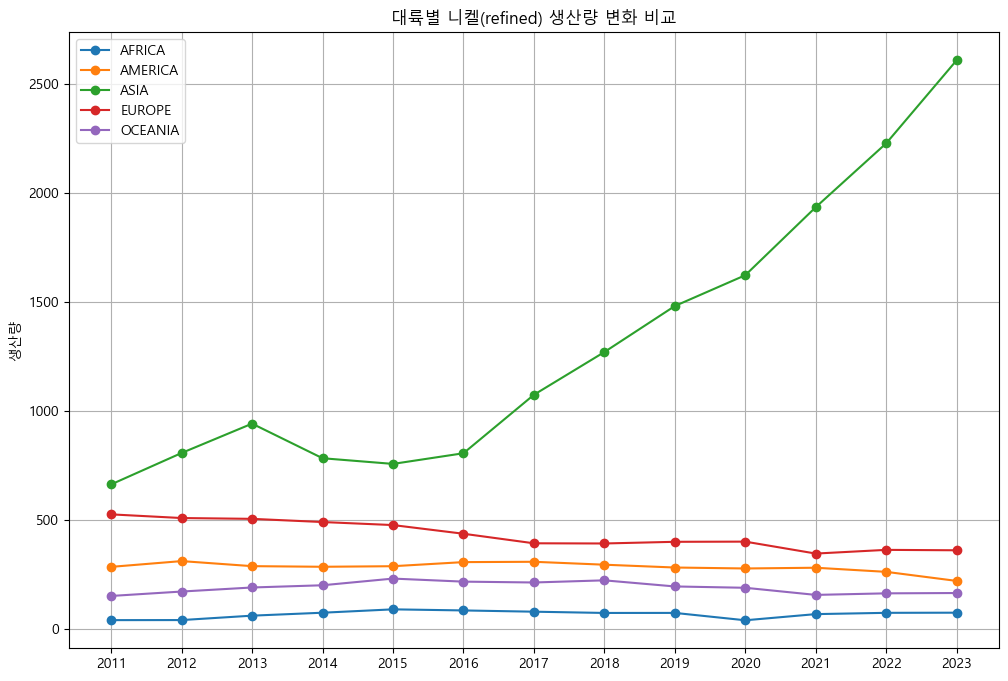

In [53]:
# 대륙별 생산량 변화량 비교
plt.figure(figsize=(12, 8))

for c in df.columns:
    plt.plot(df1.index, df1[c], marker='o', label=c)

plt.title('대륙별 니켈(refined) 생산량 변화 비교')
plt.xlabel('')
plt.ylabel('생산량')
plt.legend()
plt.grid()
plt.show()